In [912]:
# PCA(주성분 분석)
# 전체 특성에서 주요 특성 압축/융합하는 비지도 학습
# fit() + transform() 2단계 거쳐 주성분 분석

In [913]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import random

In [914]:
random.seed(42)

In [915]:
## [1] 데이터 준비

In [916]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [917]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

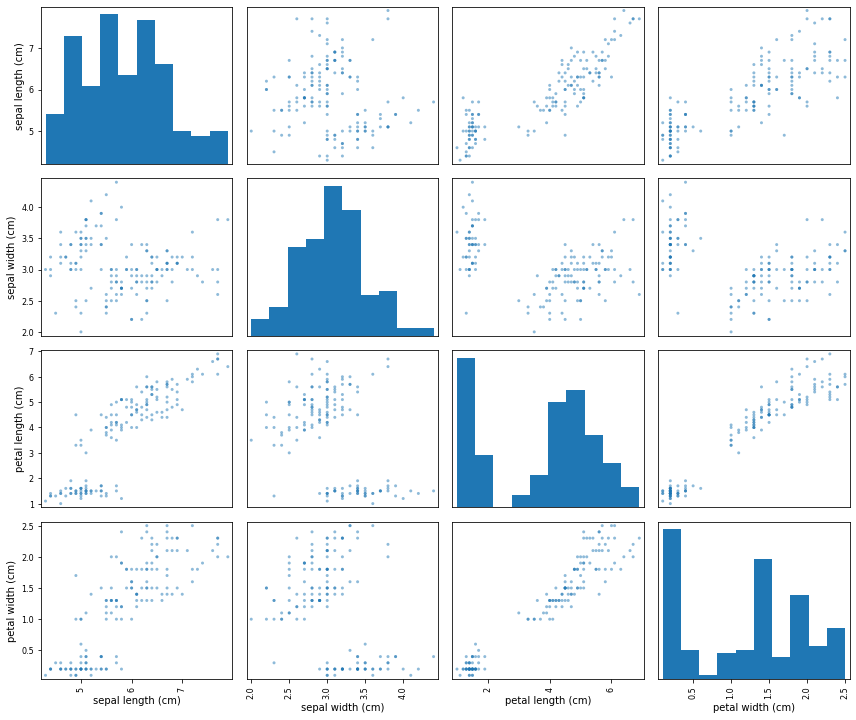

In [918]:
scatter_matrix(X, figsize=(12,10))
plt.tight_layout()
plt.show()

In [919]:
irisDF=pd.concat([X,y], axis=1)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [920]:
# 타겟별 시각화
target_0=irisDF[irisDF.target==0]
target_1=irisDF[irisDF.target==1]
target_2=irisDF[irisDF.target==2]

In [921]:
target_0.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


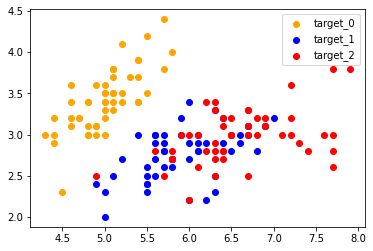

In [922]:
plt.scatter(target_0['sepal length (cm)'], target_0['sepal width (cm)'], c='orange')
plt.scatter(target_1['sepal length (cm)'], target_1['sepal width (cm)'], c='blue')
plt.scatter(target_2['sepal length (cm)'], target_2['sepal width (cm)'], c='red')
plt.legend(['target_0', 'target_1', 'target_2'])
plt.show()

In [923]:
# 데이터 전처리

In [924]:
from sklearn.preprocessing import StandardScaler

In [925]:
irisDF[irisDF.columns[:-1]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [926]:
scaler=StandardScaler()
scaler.fit(irisDF[irisDF.columns[:-1]])
X_scaled=scaler.transform(X)

In [927]:
# PCA 주성분 분석
# iris의 4개의 Feature 중에서 주성분 데이터 추출

In [928]:
pca=PCA()

In [929]:
# 지정된 데이터에서 주성분 추출
pca.fit(X_scaled)

PCA()

In [930]:
# 주성분 행렬
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [931]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [932]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [933]:
# 주성분 개수 지정
# 방법1) explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC개수 계산
# 방법2) n_componets=0.0-1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC개수 자동 계산

In [934]:
# 방법[1]: explained_variance_ratio_ 누적값으로 PC 차원수 계산

In [935]:
import numpy as np

In [936]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 개수(차원): {d}')

주성분 개수(차원): 2


In [937]:
## 지정된 PC 개수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [938]:
pca.fit(X_scaled)

PCA(n_components=2)

In [939]:
irisPCA=pca.transform(X_scaled)

In [940]:
irisPCA.shape

(150, 2)

In [941]:
irisPCA[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

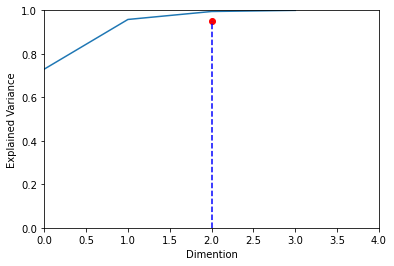

In [942]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.plot([2.0, 2.0], [0, 0.95], 'b--')
plt.axis([0,4,0,1])
plt.xlabel('Dimention')
plt.ylabel('Explained Variance')
plt.show()

In [943]:
# 방법[2] : n_components=비율값

In [944]:
pca3=PCA(n_components=0.95)

In [945]:
pca3.fit(X_scaled)

PCA(n_components=0.95)

In [946]:
pca3.explained_variance_, pca3.explained_variance_ratio_

(array([2.93808505, 0.9201649 ]), array([0.72962445, 0.22850762]))

In [947]:
irisPCA3=pca3.transform(X_scaled)
irisPCA3.shape

(150, 2)

In [948]:
irisPCADF=pd.DataFrame(irisPCA3, columns=['pca_1', 'pca_2'])

In [949]:
irisPCADF.head()

,pca_1,pca_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [950]:
irisPCADF=pd.concat([irisPCADF, y], axis=1)

In [951]:
irisPCADF.head()

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [952]:
# 타겟별 시각화
target_0=irisPCADF[irisPCADF.target==0]
target_1=irisPCADF[irisPCADF.target==1]
target_2=irisPCADF[irisPCADF.target==2]

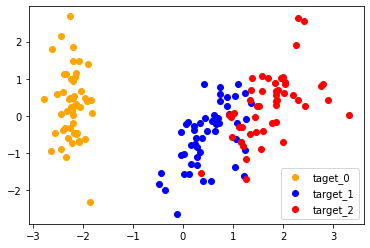

In [953]:
plt.scatter(target_0['pca_1'], target_0['pca_2'], c='orange')
plt.scatter(target_1['pca_1'], target_1['pca_2'], c='blue')
plt.scatter(target_2['pca_1'], target_2['pca_2'], c='red')
plt.legend(['taget_0','target_1','target_2'])
plt.show()

In [954]:
re=pca3.inverse_transform(irisPCA)

In [955]:
re.shape

(150, 4)

In [956]:
# MNIST + PCA
# Feature 784 ==> 주요 Feature로 압축

In [957]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [958]:
# [1] 데이터 로딩

In [959]:
(x_train, y_train), (x_test, y_test)=load_data()

In [960]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [961]:
# [2] 데이터 전처리 및 형변환

In [962]:
# 0~1 사이 범위값으로 피쳐(Feature) 정규화
x_train=x_train/255.0
x_test=x_test/255.0

In [963]:
# PCA 2차원 데이터 처리 3D => 2D 형변환
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

In [964]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')

x_train.shape : (60000, 784), x_test.shape : (10000, 784)


In [965]:
# [3] MNIST의 PC(주성분 요소) 수 찾기

In [966]:
# PCA 객체 생성
pca=PCA(n_components=0.95)

In [967]:
# PC 계산
pca.fit(x_train)

PCA(n_components=0.95)

In [968]:
# PC 확인
print(f'pca.singular_values_ : {pca.singular_values_}\npca.explained_variance_ratio_ : {pca.explained_variance_ratio_}')

pca.singular_values_ : [554.08236184 473.79289646 441.76832659 412.90967564 392.45954891
 369.34743738 321.72592959 302.04650943 295.59576934 273.06366032
 258.31039157 252.97700677 232.98056847 231.36547104 223.47337767
 216.59463867 204.70103539 200.98426661 193.8016728  190.95856472
 183.65236363 178.45839561 173.68452004 169.90685928 167.17214551
 162.9474728  160.33074547 157.72351701 153.49152274 147.83552759
 144.28725    143.19277799 138.07150073 136.22239172 134.28567117
 131.13991042 126.49333601 124.2313057  123.40999747 122.22992796
 120.20481924 118.62713309 115.06215042 112.23881111 110.35705642
 108.93302362 107.01475474 105.46372614 103.71956692 100.90840213
 100.45950025  99.47658474  96.76475599  95.60902108  94.8075482
  92.66540711  92.3380578   90.42557427  89.59931997  87.99801628
  87.22623816  87.0004999   85.37550857  83.71483558  82.22568067
  80.9665046   80.14523835  78.90007754  78.10823212  77.24889952
  76.90918966  75.68727777  74.94785429  74.38349456  

In [969]:
# PC기반 데이터 투영
mnistPCA=pca.transform(x_train)

In [970]:
print(f'mnistPCA.shape : {mnistPCA.shape}')

mnistPCA.shape : (60000, 154)


In [971]:
# 압축된 피쳐성분기반 원래 성분 복원
reMnist=pca.inverse_transform(mnistPCA)
reMnist.shape

(60000, 784)

In [972]:
# PCA 전후 이미지 비교
def drawImage(selecImg, title):
    plt.imshow(selecImg.reshape(28,28), cmap='gray')
    plt.title(f'[{title}]')
    plt.show()

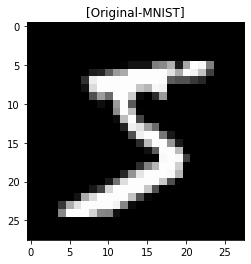

In [973]:
drawImage(x_train[0], 'Original-MNIST')

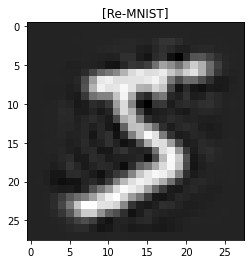

In [974]:
drawImage(reMnist[0], 'Re-MNIST')

In [975]:
# K-Means 분할적 군집화
# 지정된 K만큼 임의의 중심점(Centroid)를 지정
# 중심점을 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
# 군집마다 다시 중심점 계산
# 중심점 이동이 더 이상 변경되지 않을 때까지 반복하는 방법

In [976]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [977]:
# [1] 데이터 로딩 밎 준비

In [978]:
iris=load_iris()

In [979]:
irisData=iris.data

In [980]:
irisData.shape

(150, 4)

In [981]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [982]:
irisData=irisData[:, :2]
irisData.shape

(150, 2)

In [983]:
from sklearn.preprocessing import StandardScaler

In [984]:
scaler=StandardScaler()

In [985]:
scaler.fit(irisData)

StandardScaler()

In [986]:
scaled_irisData=scaler.transform(irisData)

In [987]:
# [2] 데이터 처리

In [988]:
irisCluster=KMeans(n_clusters=2)

In [989]:
irisCluster.fit(scaled_irisData)

KMeans(n_clusters=2)

In [990]:
# Cluster 객체 속성 확인
print(f'cluster_centers_ : {irisCluster.cluster_centers_}')
print(f'labels_ : {irisCluster.labels_}')
print(f'labels_ counts : {np.unique(irisCluster.labels_, return_counts=True)}')
print(f'inertia_ : {irisCluster.inertia_}')
print(f'n_iter_ : {irisCluster.n_iter_}')

cluster_centers_ : [[ 0.4891143  -0.45195298]
 [-0.97822861  0.90390597]]
labels_ : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
labels_ counts : (array([0, 1]), array([100,  50], dtype=int64))
inertia_ : 166.9517093393448
n_iter_ : 6


In [991]:
# 샘플데이터 => 결정된 군집으로 변환
transIris=irisCluster.transform(scaled_irisData)

In [992]:
irisCluster.cluster_centers_[0]

array([ 0.4891143 , -0.45195298])

In [993]:
# 시각화

In [994]:
import pandas as pd

In [995]:
irisDF=pd.DataFrame(scaled_irisData)
irisDF.shape

(150, 2)

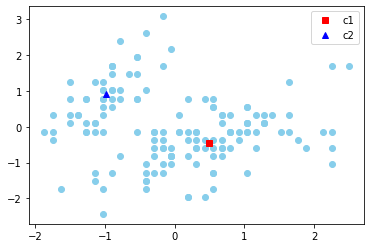

In [996]:
plt.scatter(scaled_irisData[:, 0], scaled_irisData[:, 1], c='skyblue')
plt.plot(irisCluster.cluster_centers_[0][0], irisCluster.cluster_centers_[0][1], 'rs', label='c1')
plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'b^', label='c2')
plt.legend()
plt.show()

In [997]:
inert=[]
for n_clusters in range(1,11):
    irisCluster=KMeans(n_clusters)
    irisCluster.fit(scaled_irisData)
    inert.append(irisCluster.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


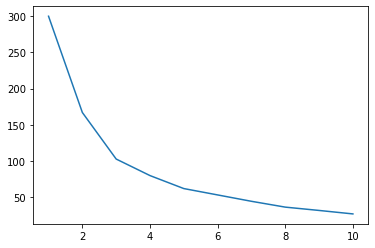

In [998]:
# 최적의 k 찾기
plt.plot(range(1,11), inert)
plt.show()

In [999]:
# 군집화 성능 체크
# 실루엣 계수/지수/인덱스
# 범위: -1~1
# 1: 군집화 아주 잘 됨
# 0.5: 군집화 잘 됨
# -1: 군집화 안됨

In [1000]:
# 실루엣 점수 <- 1 에 가까울수록 군집화 잘 된 것
from sklearn.metrics import silhouette_score

silhouette_score(scaled_irisData, irisCluster.labels_, metric='euclidean')

0.4129125147017339

In [1001]:
# n_clusters=5 에 대한 데이터
irisCluster=KMeans(n_clusters=5)
irisCluster.fit(scaled_irisData)
transIris=irisCluster.transform(scaled_irisData)

# Cluster 객체 속성 확인
print(f'cluster_centers_ : {irisCluster.cluster_centers_}')
print(f'labels_          : {irisCluster.labels_}')
print(f'labels_ Counts   : {np.unique(irisCluster.labels_, return_counts=True)}')
print(f'inertia_         : {irisCluster.inertia_}')
print(f'n_iter_          : {irisCluster.n_iter_}')

cluster_centers_ : [[-0.5631421   1.89046354]
 [ 1.22714485  0.17682106]
 [-0.473405   -1.53739132]
 [ 0.18982966 -0.54745657]
 [-1.1776363   0.51257147]]
labels_          : [4 4 4 4 4 0 4 4 4 4 0 4 4 4 0 0 0 4 0 0 4 0 4 4 4 4 4 4 4 4 4 4 0 0 4 4 0
 4 4 4 4 2 4 4 0 4 0 4 0 4 1 1 1 2 3 3 1 2 1 2 2 3 2 3 3 1 3 3 2 2 3 3 3 3
 3 1 1 1 3 2 2 2 3 3 3 1 1 2 3 2 2 3 3 2 3 3 3 3 2 3 1 3 1 3 1 1 2 1 3 1 1
 3 1 2 3 1 1 1 1 2 1 3 1 3 1 1 3 3 3 1 1 1 3 3 3 1 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]
labels_ Counts   : (array([0, 1, 2, 3, 4]), array([14, 41, 19, 41, 35], dtype=int64))
inertia_         : 61.83711004540086
n_iter_          : 5


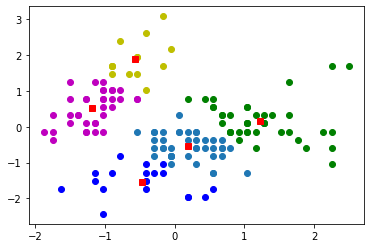

In [1002]:
# 군집 시각화
plt.plot(scaled_irisData[irisCluster.labels_==0][:, 0], scaled_irisData[irisCluster.labels_==0][:, 1], 'yo')
plt.plot(scaled_irisData[irisCluster.labels_==1][:, 0], scaled_irisData[irisCluster.labels_==1][:, 1], 'go')
plt.plot(scaled_irisData[irisCluster.labels_==2][:, 0], scaled_irisData[irisCluster.labels_==2][:, 1], 'bo')
plt.plot(scaled_irisData[irisCluster.labels_==3][:, 0], scaled_irisData[irisCluster.labels_==3][:, 1], 'o')
plt.plot(scaled_irisData[irisCluster.labels_==4][:, 0], scaled_irisData[irisCluster.labels_==4][:, 1], 'mo')
plt.plot(irisCluster.cluster_centers_[0][0], irisCluster.cluster_centers_[0][1], 'rs')
plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'rs')
plt.plot(irisCluster.cluster_centers_[2][0], irisCluster.cluster_centers_[2][1], 'rs')
plt.plot(irisCluster.cluster_centers_[3][0], irisCluster.cluster_centers_[3][1], 'rs')
plt.plot(irisCluster.cluster_centers_[4][0], irisCluster.cluster_centers_[4][1], 'rs')
plt.show()

In [1003]:
irisCluster.labels_

array([4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 2, 4, 4,
       0, 4, 0, 4, 0, 4, 1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 3, 1,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 1, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3])

In [1004]:
# 군집화 이후 추가 작업
# 라벨과 데이터를 가지고 지도학습 분류로 성능 체크

In [1005]:
from sklearn.linear_model import LogisticRegression

In [1006]:
# 군집화로 생성된 데이터
target=irisCluster.labels_.reshape(-1,1)
target.shape, scaled_irisData.shape

((150, 1), (150, 2))

In [1007]:
lrModel=LogisticRegression(random_state=11, max_iter=500)
lrModel.fit(scaled_irisData, irisCluster.labels_)

LogisticRegression(max_iter=500, random_state=11)

In [1008]:
pre_label=lrModel.predict(scaled_irisData)

In [1009]:
lrModel.score(scaled_irisData, irisCluster.labels_)

0.9866666666666667

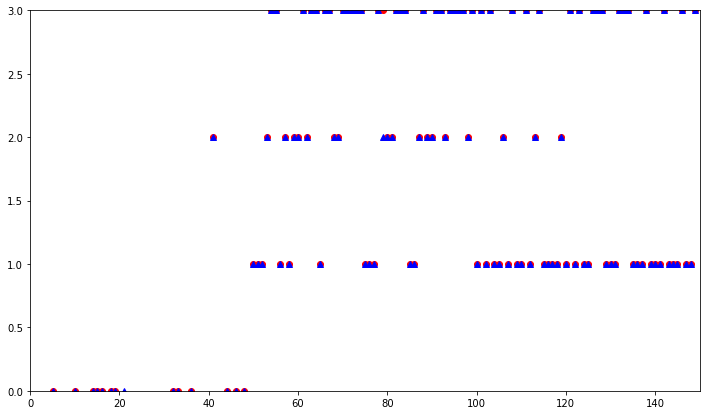

In [1010]:
plt.figure(figsize=(12,7))
plt.plot(pre_label, 'ro')
plt.plot(irisCluster.labels_, 'b^')
plt.axis([0,150,0,3])
plt.show()

In [1011]:
# AutoEncode 노이즈 제거
# 데이터에 노이즈 제거 활용
# 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
# 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [1012]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt

In [1013]:
# [1] 데이터 준비 및 로딩
(x_train, y_train), (x_test, y_test) = load_data()

In [1014]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [1015]:
# [2] 전처리

In [1016]:
x_train=x_train.reshape(-1, 28*28)/255.0
x_test=x_test.reshape(-1, 28*28)/255.0

In [1017]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [1018]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
x_train_noised=x_train+np.random.normal(0,0.5,size=x_train.shape)
x_test_noised=x_test+np.random.normal(0,0.5,size=x_test.shape)

# 픽셀 범위 0.0~1.0 벗어나느 픽셀값 조정 np.clip(array, min, max)
x_train_noised=np.clip(x_train_noised,a_min=0,a_max=1)
x_test_noised=np.clip(x_test_noised,a_min=0,a_max=1)

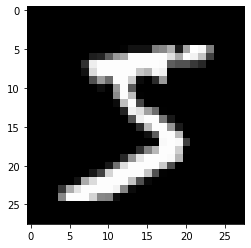

In [1019]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

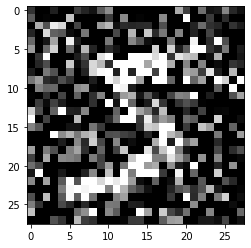

In [1020]:
plt.imshow(x_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

In [1021]:
# [3] 모델 구성 및 생성

In [1022]:
# W,b 초기값 고정
set_random_seed(11)

In [1023]:
def createAEModel(n_node):
    model=Sequential()
    # 입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    # 은닉
    model.add(Dense(units=n_node, activation='relu'))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [1024]:
oneModel=createAEModel(1)

In [1025]:
oneModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 785       
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 784)               1568      
                                                                 
Total params: 2,355
Trainable params: 2,355
Non-trainable params: 0
_________________________________________________________________


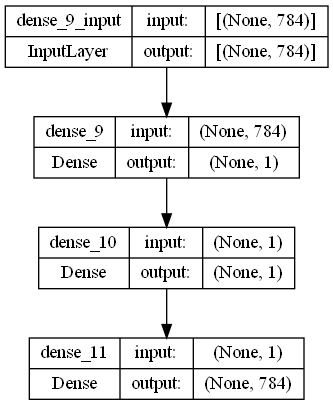

In [1026]:
plot_model(oneModel, show_shapes=True)

In [1027]:
# [4] 모델 학습

In [1028]:
oneModel.fit(x_train_noised, x_train, epochs=10, verbose=0)

In [1029]:
x_train_noised.shape

(60000, 784)

In [1030]:
oneModel.evaluate(x_test, x_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0802


0.0801759585738182

In [1031]:
# [5] 예측
# 새로운 데이터 사용
pre_out1=oneModel.predict(x_test_noised[0].reshape(-1,784))

1/1 [==============================] - 0s 68ms/step


In [1032]:
# 원본 이미지 - AE 진행된 이미지 비교

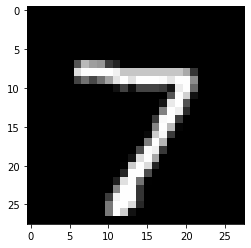

In [1033]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

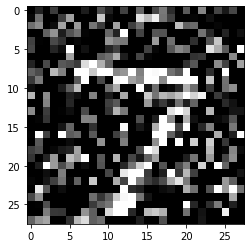

In [1034]:
plt.imshow(x_test_noised[0].reshape(28,28), cmap='gray')
plt.show()

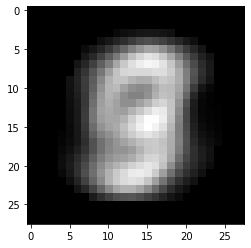

In [1035]:
plt.imshow(pre_out1[0].reshape(28,28), cmap='gray')
plt.show()

In [1036]:
# AutoEncode
# 표현(특징) 학습
# 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
# 구성
# 인코더(Encoder): 입력 데이터에서 주요 특징 추출/압축
# 디코더(Decoder): 주요 특징에서 원 데이터로 복원

In [1037]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [1038]:
# 데이터 준비 및 로딩
(x_train, y_train), (x_test, y_test) = load_data()

In [1039]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [1040]:
# [2] 데이터 전처리

In [1041]:
x_train=x_train.reshape(-1,28*28)/255.0
x_test=x_test.reshape(-1, 28*28)/255.0

In [1042]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [1043]:
x_train,x_test,y_train,y_test=train_test_split(x_train, y_train,
                                              random_state=12,
                                              stratify=y_train)

In [1044]:
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train,
                                              random_state=12,
                                              stratify=y_train)

In [1045]:
print(x_train.shape, x_test.shape, x_val.shape)

(33750, 784) (15000, 784) (11250, 784)


In [1046]:
# [3] 모델 구성 및 생성

In [1047]:
# W,b 초기값 고정
set_random_seed(11)

In [1049]:
def createAEModel(n_node):
    model=Sequential()
    # 입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [1050]:
oneModel=createAEModel(1)

In [1051]:
oneModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 785       
                                                                 
 dense_13 (Dense)            (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


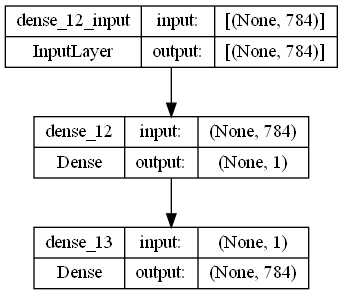

In [1053]:
plot_model(oneModel, show_shapes=True)

In [1055]:
# [4] 모델 학습

In [1056]:
# x 값 모두 입력 데이터
oneModel.fit(x_train, x_train, epochs=10, verbose=0)

In [1057]:
oneModel.evaluate(x_test, x_test)

469/469 [==============================] - 1s 1ms/step - loss: 0.0610


0.06097128614783287

In [1058]:
# [5] 예측
# 새로운 데이터 사용

In [1059]:
pre_out1=oneModel.predict(x_val[0].reshape(-1,784))

1/1 [==============================] - 0s 43ms/step


In [1060]:
# 원본 이미지 - AE 진행된 이미지 비교

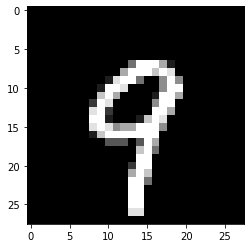

In [1062]:
plt.imshow(x_val[0].reshape(28,28), cmap='gray')
plt.show()

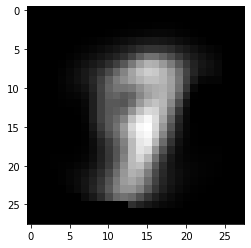

In [1063]:
plt.imshow(pre_out1[0].reshape(28,28), cmap='gray')
plt.show()

11250